In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import plotly as py
import plotly.graph_objs as go
# import hdbscan
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
df = pd.read_csv('dataset_reg.csv', index_col=['Unnamed: 0'])
df = df.drop(df.columns[2], axis=1)
print(df.describe())
scaler = StandardScaler()
df[df.columns.tolist()] = scaler.fit_transform(df[df.columns.tolist()])
print(df.head())

              rmse  int_parsivel        feat0        feat1         feat2  \
count  3706.000000   3706.000000  3706.000000  3706.000000  3.706000e+03   
mean      1.319494     20.087540     0.000113     0.000018  3.379114e-06   
std       0.544481     19.882100     0.000104     0.000014  8.300305e-06   
min       0.416565      6.001500    -0.000057    -0.000040 -4.733532e-05   
25%       0.861843      8.391500     0.000037     0.000008 -4.229750e-07   
50%       1.206686     12.867667     0.000090     0.000015  2.589857e-06   
75%       1.664515     23.870542     0.000167     0.000025  7.362219e-06   
max       3.261437    188.963167     0.000754     0.000099  4.915919e-05   

              feat3         feat4         feat5         feat6        feat7  \
count  3.706000e+03  3.706000e+03  3.706000e+03  3.706000e+03  3706.000000   
mean  -5.228028e-07 -6.559699e-07 -1.319390e-06  3.792693e-07    -0.000001   
std    8.693902e-06  4.379540e-06  4.905868e-06  6.031875e-06     0.000006   
min

In [3]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(df, cluster_labels)).plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

KeyboardInterrupt: 

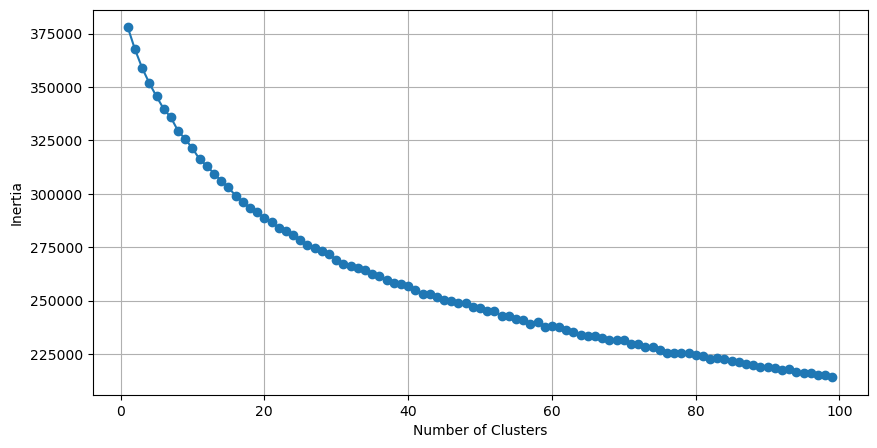

In [8]:
# try using elbow method to find optimal number of clusters
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    # generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, '-o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

optimise_k_means(df[df.columns.tolist()], 100)

In [3]:
number_of_clusters = 11
kmeans = KMeans(n_clusters = number_of_clusters)
kmeans.fit(df[df.columns.tolist()])
df['kmeans'] = kmeans.labels_
df

,rmse,int_parsivel,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,kmeans
2021-07-13 06:47:00+08:00,-0.182255,-0.695110,-1.386450,-1.284188,-0.424012,0.003427,0.622664,0.323248,-0.086327,0.323937,...,0.034218,-0.133177,0.265329,-0.694791,0.205769,0.136734,0.477934,0.625101,0.019464,9
2021-07-20 07:57:00+08:00,1.704371,-0.576310,-1.254786,-0.845057,-0.154791,0.349094,0.290221,0.076974,-0.251075,-0.065048,...,-0.130664,-0.016498,0.293761,0.388234,0.076529,-0.381023,0.039221,0.359765,-0.234149,3
2021-07-20 07:58:00+08:00,2.152467,-0.459539,-1.004206,-0.978601,-0.190495,0.735758,0.187239,0.043506,-0.317793,-0.301698,...,-0.080566,0.105993,0.917587,0.654540,0.779508,-0.224112,-0.965716,-0.623731,-0.899142,3
2021-07-20 07:59:00+08:00,1.378613,0.128305,-0.519445,-0.277091,0.207662,0.506539,0.437591,-0.543413,-0.584585,-0.706796,...,0.824112,0.433897,0.453385,0.644667,-0.772485,-0.518858,-0.676283,0.930303,0.344479,3
2021-07-20 08:00:00+08:00,1.236130,0.124348,-0.131634,0.011568,0.242000,0.675669,-0.101224,-1.111893,-0.381240,-1.078172,...,0.314741,1.154561,-0.494554,-0.205737,-1.410438,1.099881,0.628565,1.400973,0.474489,3
2021-07-20 08:01:00+08:00,0.617239,-0.413730,-0.287983,-0.395478,-0.675574,0.677801,-0.272201,-0.654712,0.644059,-0.953376,...,-0.246945,0.605441,1.348994,1.334947,-0.640414,1.382605,0.110436,0.362482,-0.817073,6
2021-07-20 08:02:00+08:00,0.236562,-0.447894,-0.168589,-0.488613,-0.774066,1.038798,-0.319483,-0.493910,0.880036,-0.955106,...,0.245341,-1.216753,1.479916,1.864152,-0.848673,1.740863,0.768436,0.835929,-0.624598,6
2021-07-20 16:43:00+08:00,-0.732884,-0.505030,-0.593892,-0.454052,-0.571189,0.198647,-0.423920,0.199676,0.431716,-0.236166,...,0.201629,0.225389,-0.494933,-0.642538,-0.889361,1.145989,-0.000880,1.495691,-0.043498,9
2021-07-20 16:44:00+08:00,-0.267897,0.421145,0.182256,0.514894,0.606892,0.034866,1.412612,-0.480598,-0.903399,-0.513330,...,1.203332,-0.816000,2.032218,0.185646,-0.508312,-0.292029,0.021481,0.103777,1.361842,9
2021-07-20 16:45:00+08:00,0.070877,-0.287519,0.130671,0.186280,0.353996,0.538900,0.209278,-0.233519,1.656018,-0.362694,...,1.415919,-1.224076,0.884719,-0.608470,0.241661,1.183036,0.163949,0.867139,-0.373630,6


In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(df)
df['hdbscan'] = clusterer.labels_
df

In [ ]:
print(clusterer.labels_.max())

In [30]:
plotX = pd.DataFrame(np.array(df.sample(2000)))
plotX.columns = df.columns

#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["hdbscan"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["hdbscan"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["hdbscan"], axis=1)))

PCs_1d.columns = ["PC1_1d"]

PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

plotX["dummy"] = 0

cluster0 = plotX[plotX["hdbscan"] == 0]
cluster1 = plotX[plotX["hdbscan"] == 1]
cluster2 = plotX[plotX["hdbscan"] == 2]
cluster3 = plotX[plotX["hdbscan"] == 3]
cluster4 = plotX[plotX["hdbscan"] == 4]
cluster5 = plotX[plotX["hdbscan"] == 5]
cluster6 = plotX[plotX["hdbscan"] == 6]
cluster7 = plotX[plotX["hdbscan"] == 7]
cluster8 = plotX[plotX["hdbscan"] == 8]
cluster9 = plotX[plotX["hdbscan"] == 9]
cluster10 = plotX[plotX["hdbscan"] == 10]

init_notebook_mode(connected=True)

KeyError: "['hdbscan'] not found in axis"

In [4]:
plotX = pd.DataFrame(np.array(df.sample(2000)))
plotX.columns = df.columns

#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["kmeans"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["kmeans"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["kmeans"], axis=1)))

PCs_1d.columns = ["PC1_1d"]

PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

plotX["dummy"] = 0

cluster0 = plotX[plotX["kmeans"] == 0]
cluster1 = plotX[plotX["kmeans"] == 1]
cluster2 = plotX[plotX["kmeans"] == 2]
cluster3 = plotX[plotX["kmeans"] == 3]
cluster4 = plotX[plotX["kmeans"] == 4]
cluster5 = plotX[plotX["kmeans"] == 5]
cluster6 = plotX[plotX["kmeans"] == 6]
cluster7 = plotX[plotX["kmeans"] == 7]
cluster8 = plotX[plotX["kmeans"] == 8]
cluster9 = plotX[plotX["kmeans"] == 9]
cluster10 = plotX[plotX["kmeans"] == 10]

init_notebook_mode(connected=True)

In [6]:
data = []
clusters = [cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8, cluster9, cluster10]
colors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for i, cluster in enumerate(clusters):
    trace = go.Scatter(
        x = cluster["PC1_1d"],
        y = cluster["dummy"],
        mode = "markers",
        name = "Cluster " + str(i),
        marker = dict(color = colors[i], size = 6),
        text = None
    )
    data.append(trace)

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [7]:
data = []
clusters = [cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8, cluster9, cluster10]
colors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for i, cluster in enumerate(clusters):
    trace = go.Scatter(
        x = cluster["PC1_2d"],
        y = cluster["PC2_2d"],
        mode = "markers",
        name = "Cluster " + str(i),
        marker = dict(color = colors[i], size =4),
        text = None
    )
    data.append(trace)

title = "Visualizing Clusters in Two Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [8]:
data = []
clusters = [cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8, cluster9, cluster10]
colors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for i, cluster in enumerate(clusters):
    trace = go.Scatter3d(
        x = cluster["PC1_3d"],
        y = cluster["PC2_3d"],
        z = cluster["PC3_3d"],
        mode = "markers",
        name = "Cluster " + str(i),
        marker = dict(color = colors[i], size = 4),
        text = None
    )
    data.append(trace)

title = "Visualizing Clusters in Three Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)